<a href="https://colab.research.google.com/github/etnarojasflores/DataScienceClass/blob/main/EDA_TC2031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis exploratorio
¿Qué describen los datos?
Una encuesta applicada a jóvenes

In [1]:
# Importar librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer el CSV
df = pd.read_csv('preferencias_respuestas.csv')
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
variables = df.columns.tolist()

In [5]:
variables

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [7]:
dem_var = list(variables[-10:])


In [ ]:
# Ver cantidad de valores faltantes
df.isnull().sum().sort_values(ascending=False)[:15]

Weight                   20
Height                   20
Passive sport            15
Chemistry                10
Geography                 9
Documentary               8
Latino                    8
Smoking                   8
Punk                      8
Theatre                   8
Rock n roll               7
Countryside, outdoors     7
Gardening                 7
Techno, Trance            7
Alternative               7
dtype: int64

## Parece ser son los resutados de una encuesta que van del 1 al 5. Para estar seguros se puede hacer estadistica descriptiva

In [ ]:
# Estadistica descriptiva de variables numericas
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,...,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,...,3.250743,2.952381,3.302579,3.297030,2.104270,3.343564,2.672294,3.475198,3.258449,3.597815,3.158209,2.963294,3.070717,3.621272,3.518849,3.014911,3.486111,3.521825,3.461768,3.031778,3.705765,3.633831,2.973161,3.292247,2.871769,3.592040,3.551142,3.265873,2.748509,3.023833,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099,1.184094,0.694700,1.411078,1.197951,0.779789,1.209489,1.311892,1.348266,1.181761,1.219436,1.133367,1.138633,1.236101,1.263523,1.258349,1.294456,1.352496,1.227098,0.920663,1.321766,1.347298,1.384127,...,1.075319,1.278387,1.483010,0.683148,1.031344,1.055348,1.002907,1.152425,1.044675,0.943806,1.093190,0.935689,1.172117,1.120903,1.103233,1.173834,1.092452,1.268173,1.118380,1.374644,0.824323,1.001617,1.222621,0.643436,1.243674,1.309913,1.170850,0.865736,1.101502,1.144365,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [ ]:
# Estadistica descriptiva de variables categoricas
df.describe(exclude='number')

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


## Ver sexo por rango escolar

In [ ]:
# Ver la proporcion de sexo
df['Gender'].value_counts(normalize=True)

female    0.590637
male      0.409363
Name: Gender, dtype: float64

In [ ]:
new_df = df[['Gender', 'Education']]
new_df

,Gender,Education
0,female,college/bachelor degree
1,female,college/bachelor degree
2,female,secondary school
3,female,college/bachelor degree
4,female,secondary school
...,...,...
1005,female,secondary school
1006,male,masters degree
1007,female,secondary school
1008,female,college/bachelor degree


In [ ]:
count_sex_ed = new_df.groupby(['Education', 'Gender'])['Education'].count()
count_sex_ed

Education                         Gender
college/bachelor degree           female    123
                                  male       89
currently a primary school pupil  female      6
                                  male        4
doctorate degree                  male        5
masters degree                    female     44
                                  male       36
primary school                    female     54
                                  male       24
secondary school                  female    365
                                  male      253
Name: Education, dtype: int64

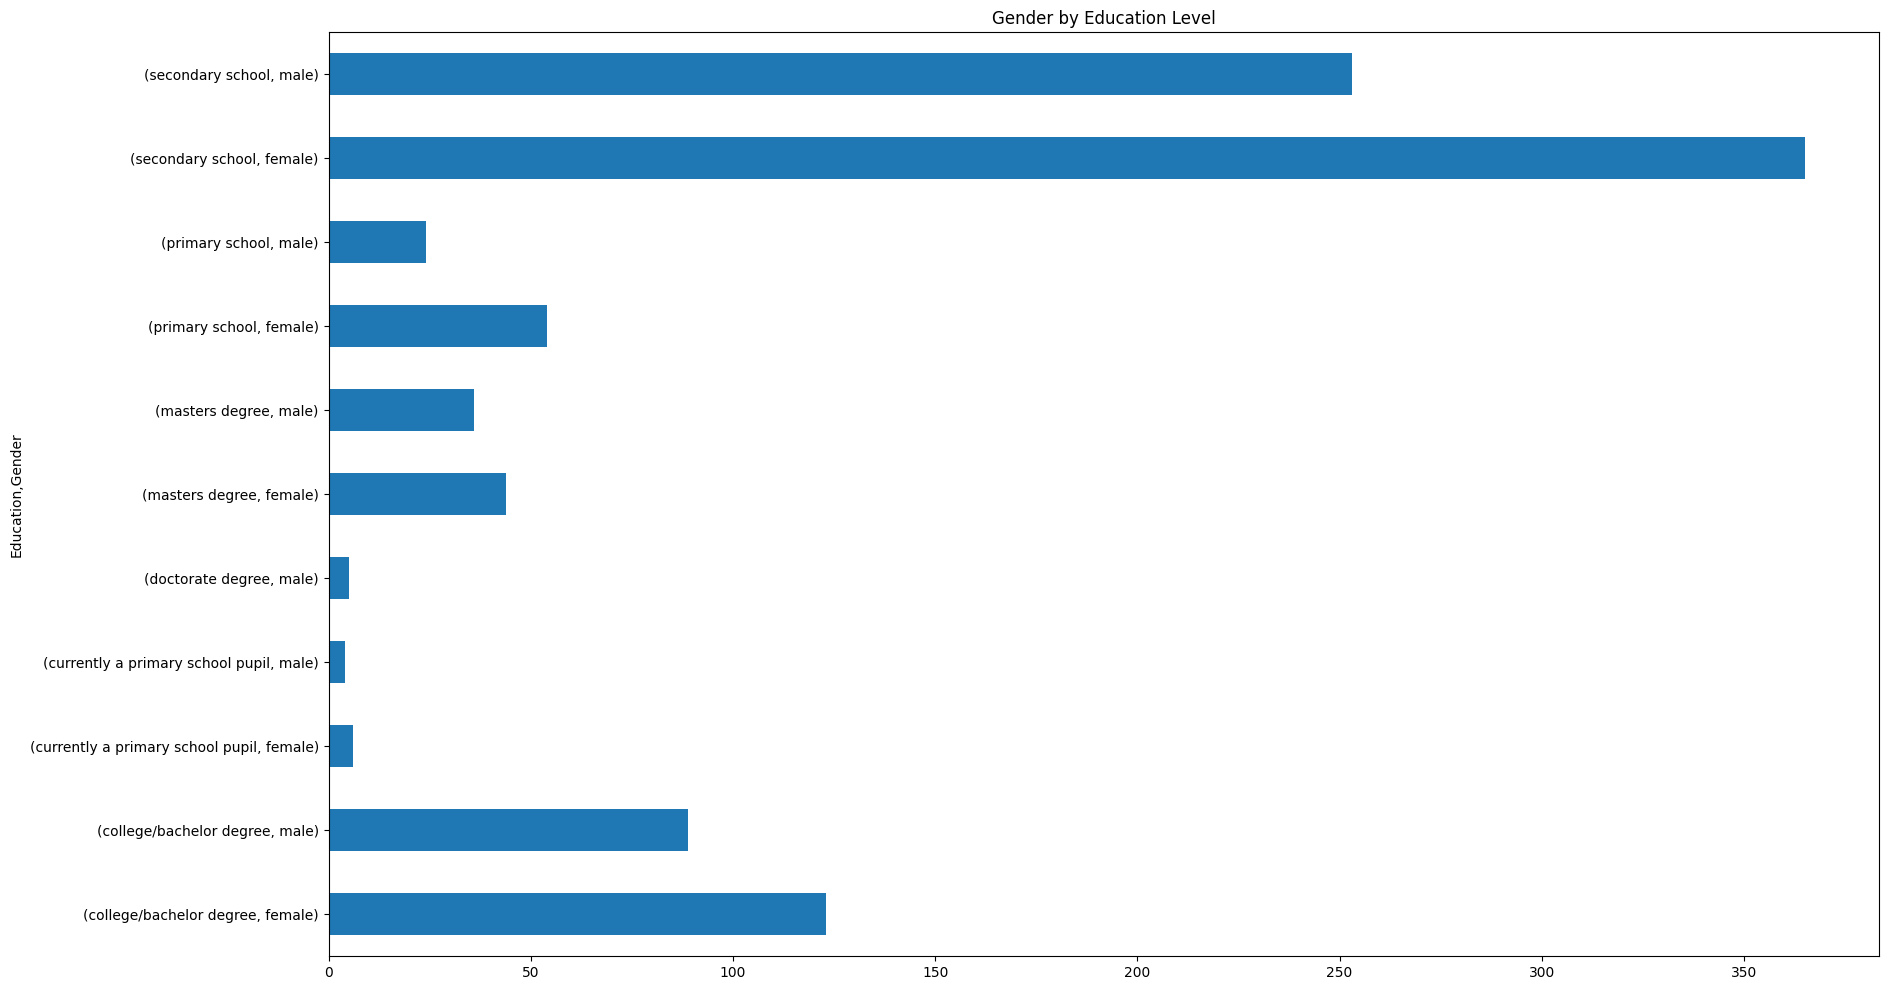

In [ ]:
# Visualización de los datos
plt.figure(figsize=(20,12))
plt.title('Gender by Education Level')
count_sex_ed.plot.barh();

### Ver intereses de mujeres en secundaria

In [ ]:
data = (df['Education'] == 'secondary school') & (df['Gender'] == 'female')
fem_secondary = df[data]
print(fem_secondary.shape)
fem_secondary.head()

(365, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0,4.0,2.0,1.0,5.0,3.0,1.0,3.0,5.0,5.0,3.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,...,5.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,less than an hour a day,4.0,3.0,1.0,3.0,4.0,1,5.0,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,5.0,1.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,3.0,4.0,4.0,2.0,2.0,4.0,1.0,3.0,3.0,4.0,5.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,1.0,4.0,3.0,few hours a day,2.0,1.0,3.0,2.0,1.0,3,4.0,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0,5.0,2.0,1.0,5.0,5.0,1.0,3.0,4.0,4.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,1.0,5.0,1.0,4.0,2.0,...,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,few hours a day,4.0,4.0,4.0,2.0,3.0,2,4.0,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats


In [ ]:
fem_secondary = fem_secondary.copy()
fem_secondary = fem_secondary.drop(columns=['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'])
fem_secondary.loc['score_mean'] = fem_secondary.mean()

In [ ]:
interests = fem_secondary.tail(1)
interests = interests.T.sort_values(by='score_mean',ascending=False)[:10]
interests

,score_mean
Music,4.829670
Movies,4.657459
Fun with friends,4.620879
Comedy,4.517808
Compassion to animals,4.162983
Empathy,4.143251
Borrowed stuff,4.068493
Judgment calls,4.046703
Internet,4.035714
Fantasy/Fairy tales,4.019178


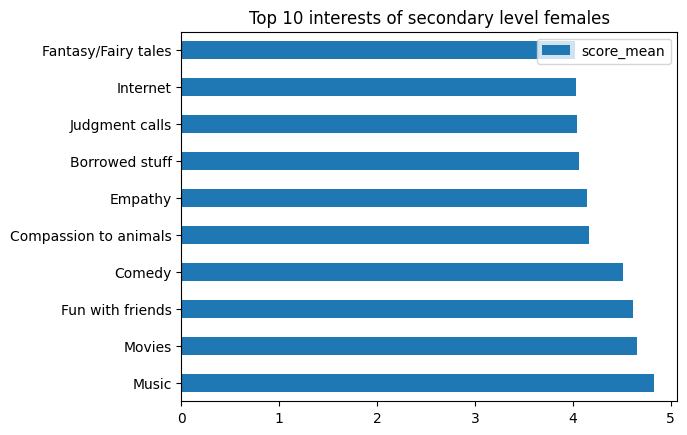

In [ ]:

# row = fem_secondary.tail(1).sort_values()
interests.plot(kind='barh')
plt.title('Top 10 interests of secondary level females')
plt.show()